In [1]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from treemind import Explainer
from treemind.plot import (
    bar_plot,
    range_plot,
    feature_plot,
    interaction_plot,
)


In [2]:
# Create LightGBM datasets

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = LGBMClassifier(verbose = -1)
model.fit(X_train, y_train)


LGBMClassifier(verbose=-1)

In [3]:
explainer = Explainer()
explainer(model)

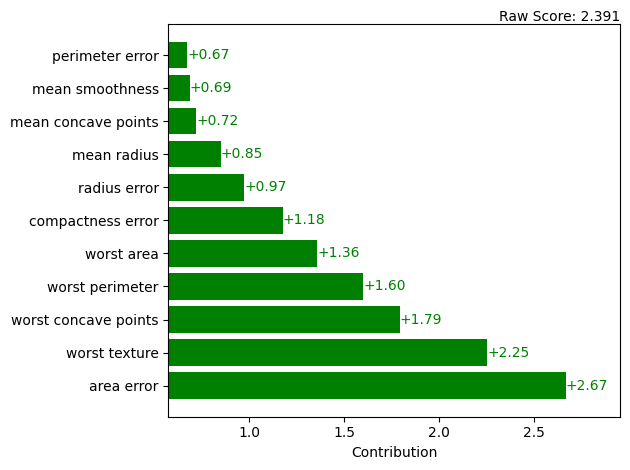

In [4]:
values, raw_score = explainer.analyze_data(X_train, detailed=False)
bar_plot(values, raw_score, columns=X_train.columns, max_col=11)

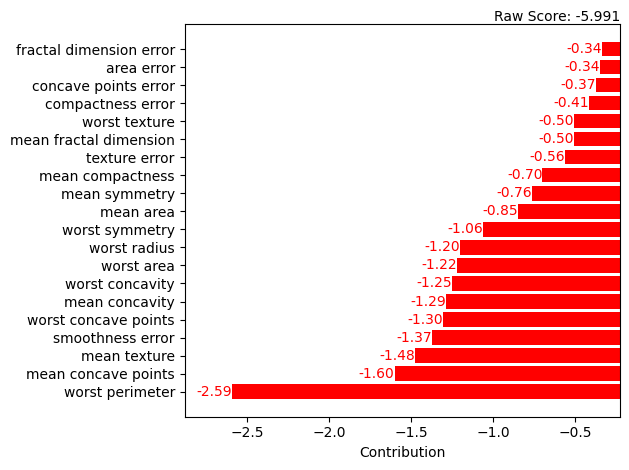

In [5]:
values, raw_score = explainer.analyze_data(X_train.iloc[[5],:], detailed=False)
bar_plot(values, raw_score, columns=X_train.columns)

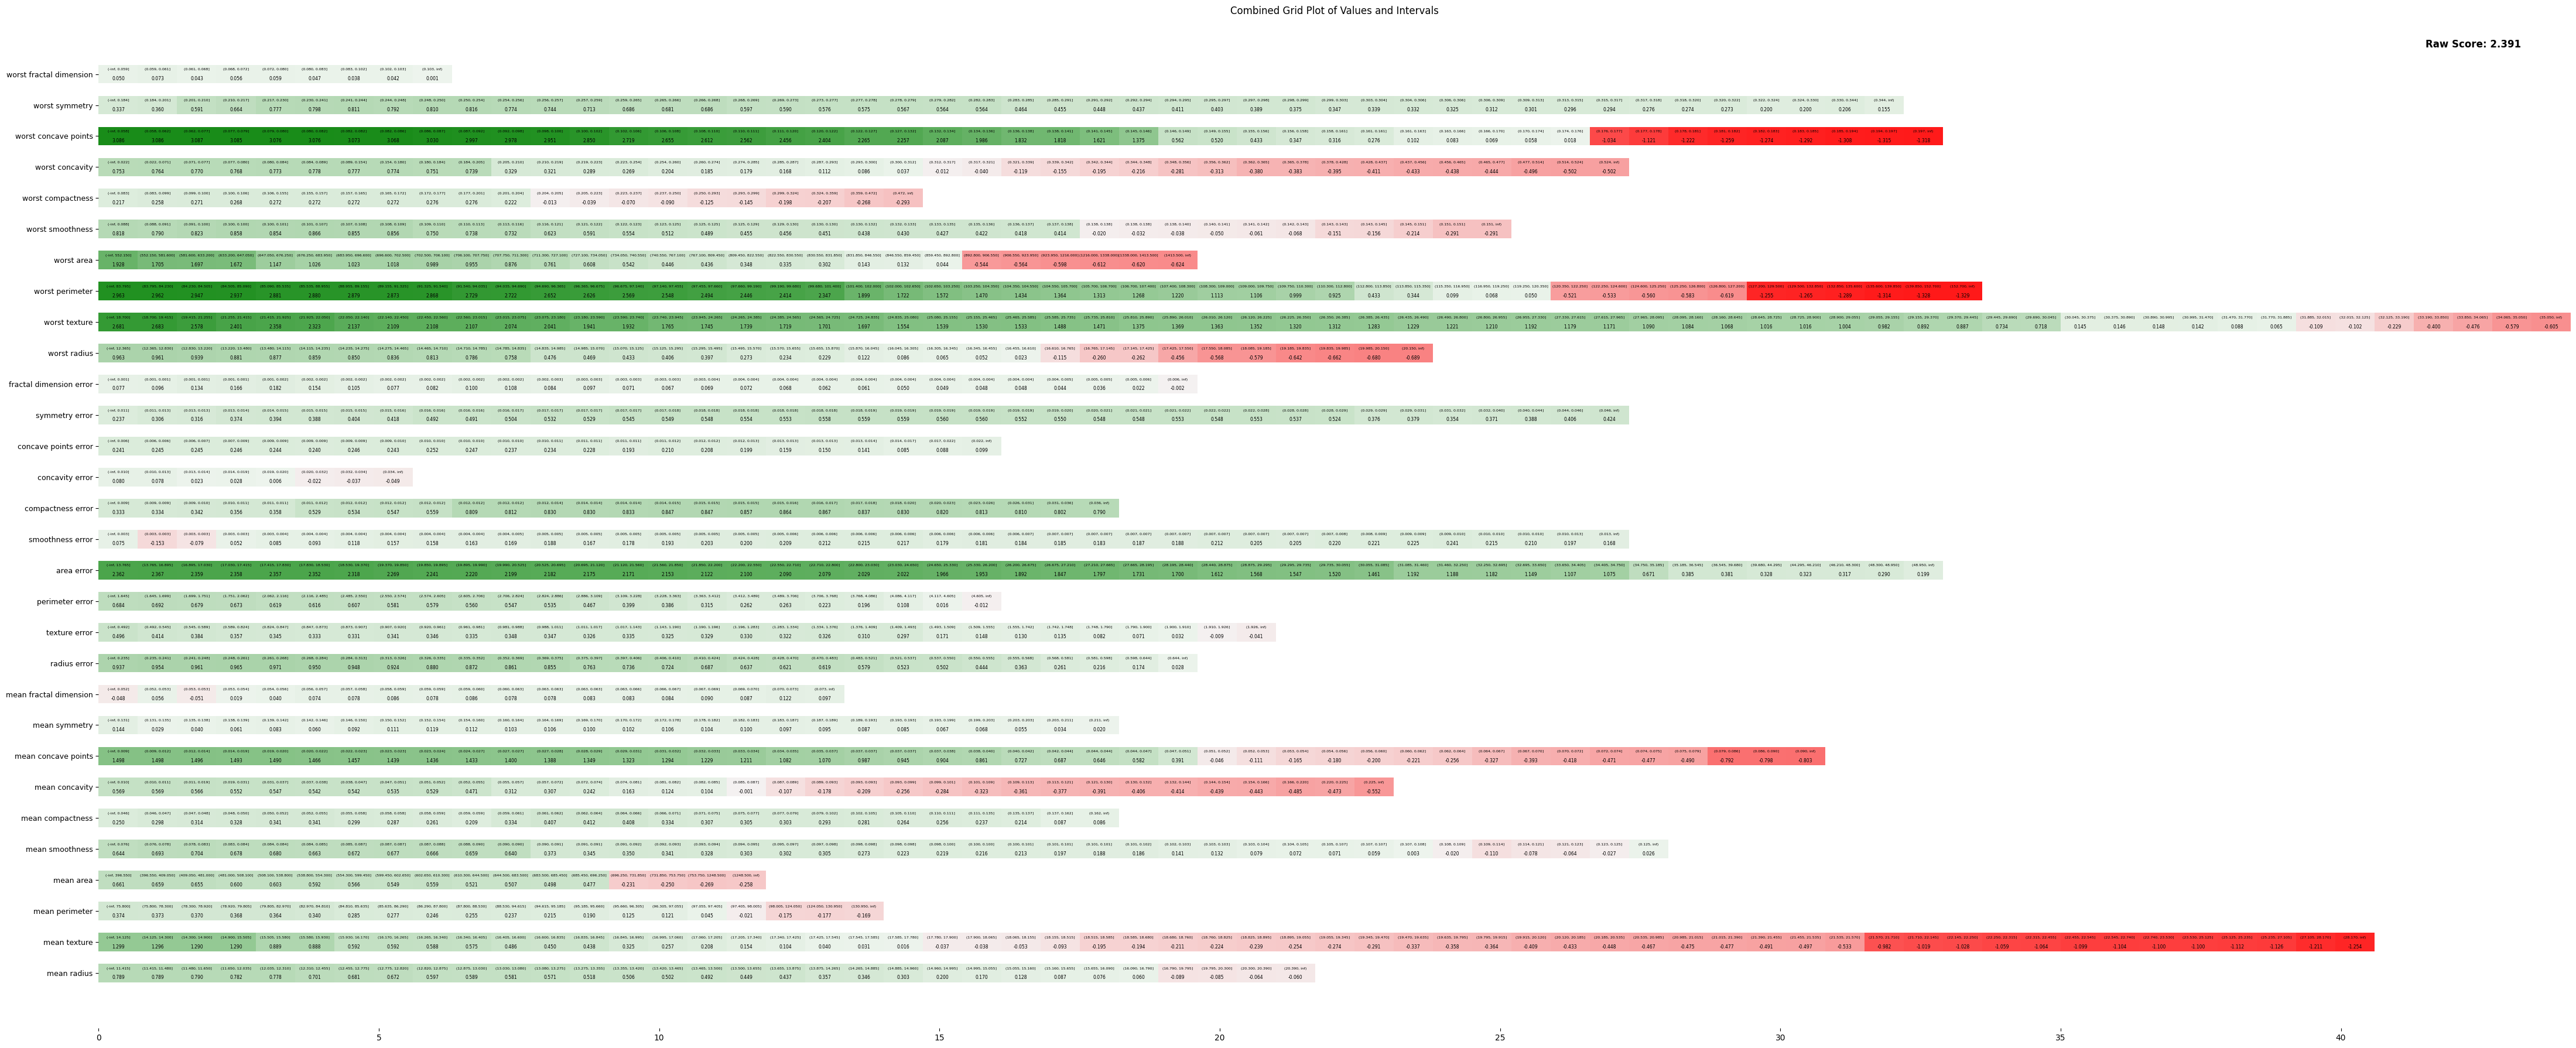

In [6]:
values, points, raw_score = explainer.analyze_data(X_train, detailed=True)

range_plot(values, raw_score, points, columns=X_train.columns, scale=1)

In [7]:
explainer.count_node(interaction = False).head()

,column_index,count
0,27,1256
1,22,1222
2,21,1161
3,1,886
4,23,724


In [8]:
feature_df = explainer.analyze_feature(27)
feature_df.head()

,worst_concave_points_lb,worst_concave_points_ub,mean,min,max
0,-inf,0.058315,4.288457,-6.999614,7.586708
1,0.058315,0.062125,4.288437,-6.999614,7.586708
2,0.062125,0.076940,4.288437,-6.999614,7.586708
3,0.076940,0.079185,4.288549,-6.999614,7.586708
4,0.079185,0.079620,4.276573,-6.999614,7.586708


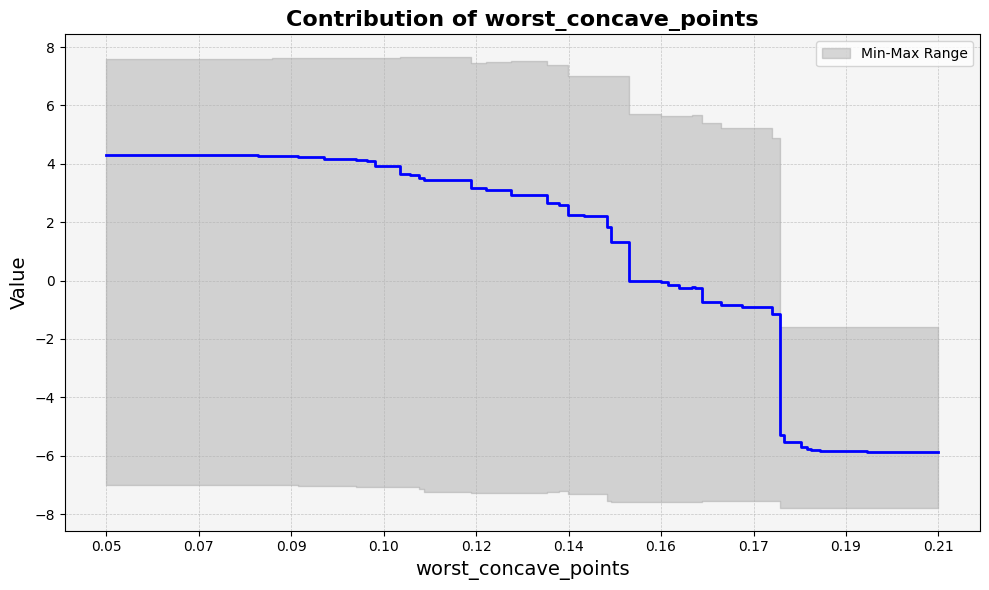

In [9]:
feature_plot(feature_df)

In [10]:
explainer.count_node(interaction = True).head()

,column1_index,column2_index,count
0,21,22,817
1,22,27,580
2,21,27,574
3,1,27,567
4,23,27,521


In [11]:
df = explainer.analyze_interaction(21, 22)
df.head()

,worst_texture_lb,worst_texture_ub,worst_perimeter_lb,worst_perimeter_ub,value
0,-inf,18.700,-inf,83.795,6.237376
1,18.700,19.415,-inf,83.795,6.237335
2,19.415,21.255,-inf,83.795,5.935314
3,21.255,21.415,-inf,83.795,5.904679
4,21.415,21.925,-inf,83.795,5.664200


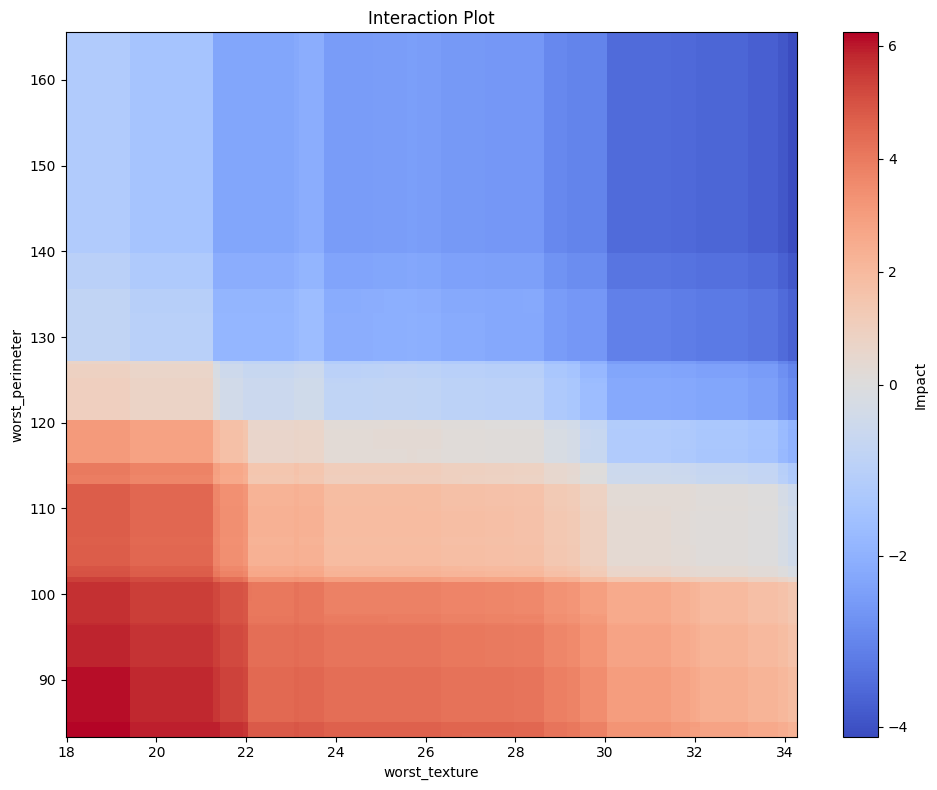

In [12]:
interaction_plot(df)